# Project work

#### Yonah Byarugaba, Zhuhang Jiang, Diqing Sun, Yige Wang, Xiangyu Zhou

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
np.random.seed(45)

drive.mount('/content/drive')

file_path = "./drive/MyDrive/Truist Challenge/Walmart.csv"


# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [ ]:
data.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
data['Store'].value_counts().reindex(range(1, 46), fill_value=0)


1     143
2     143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
22    143
23    143
24    143
25    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
45    143
Name: Store, dtype: int64

In [ ]:
data["Date"] = pd.to_datetime(data["Date"])

<ipython-input-395-38752accbdc3>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Date"] = pd.to_datetime(data["Date"])


In [ ]:
data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [ ]:
data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
data.describe()

NameError: ignored

In [ ]:
data.nunique().sort_values()

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [ ]:
# Loot at individual correlation of the features with the target
corr_with_target = data.corr()['Weekly_Sales']

# Sort by absolute value
sorted_corr_with_target = corr_with_target.apply(lambda x: abs(x)).sort_values(ascending=False)

sorted_corr_with_target

<ipython-input-400-d0cf175db8ab>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_target = data.corr()['Weekly_Sales']


Weekly_Sales    1.000000
Store           0.335332
Unemployment    0.106176
CPI             0.072634
Temperature     0.063810
Holiday_Flag    0.036891
Fuel_Price      0.009464
Name: Weekly_Sales, dtype: float64

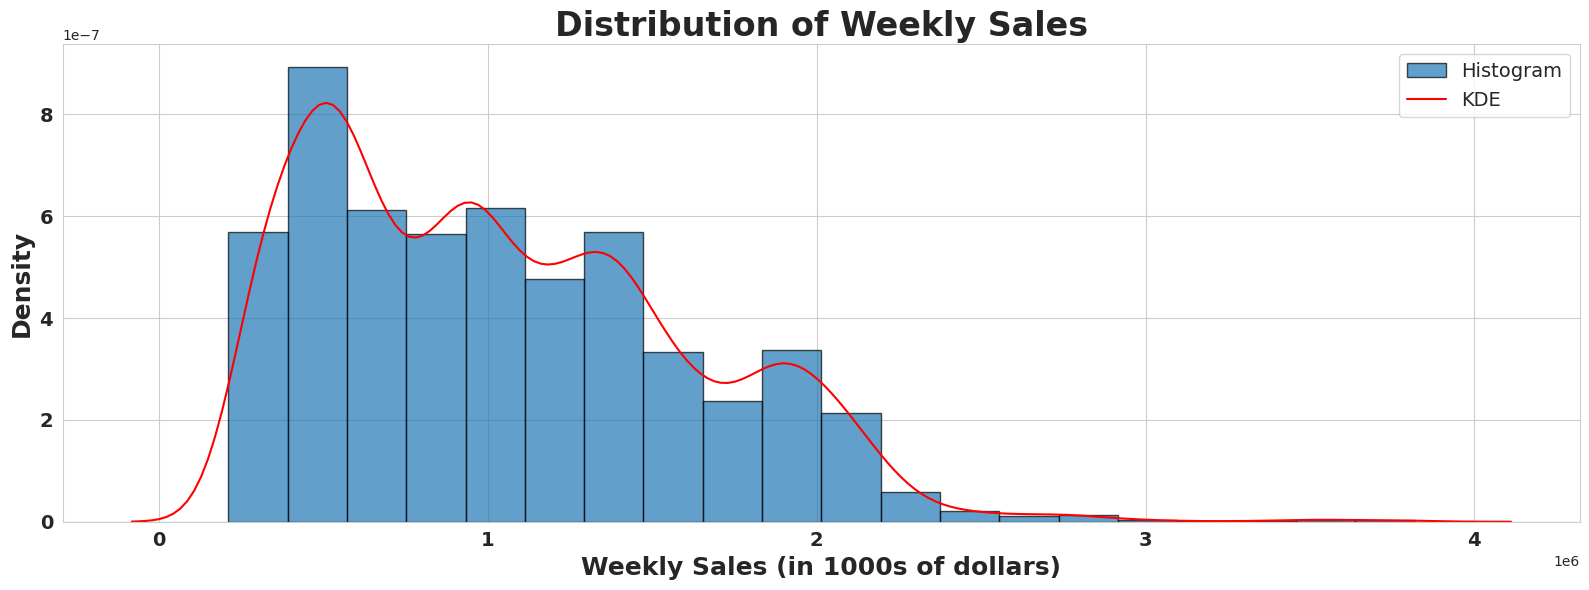

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# Plotting
plt.figure(figsize=[16,6])

# Histogram
data['Weekly_Sales'].hist(bins=20, edgecolor='black', density=True, alpha=0.7, label='Histogram')

# KDE line plot
sns.kdeplot(data['Weekly_Sales'], color='red', label='KDE')

# Title and labels
plt.title('Distribution of Weekly Sales', fontsize=24, fontweight='bold')
plt.xlabel('Weekly Sales (in 1000s of dollars)', fontsize=18, fontweight='bold')
plt.ylabel('Density', fontsize=18, fontweight='bold')
plt.legend(fontsize=14)

# Adjusting tick mark fonts
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

def format_in_thousands(x, pos):
    return '{:.0f}k'.format(x/1000)  # Divide by 1000 and append 'k'

# formatter = mticker.FuncFormatter(format_in_thousands)
# plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()  # Ensures the plot fits well within the figure
plt.show()


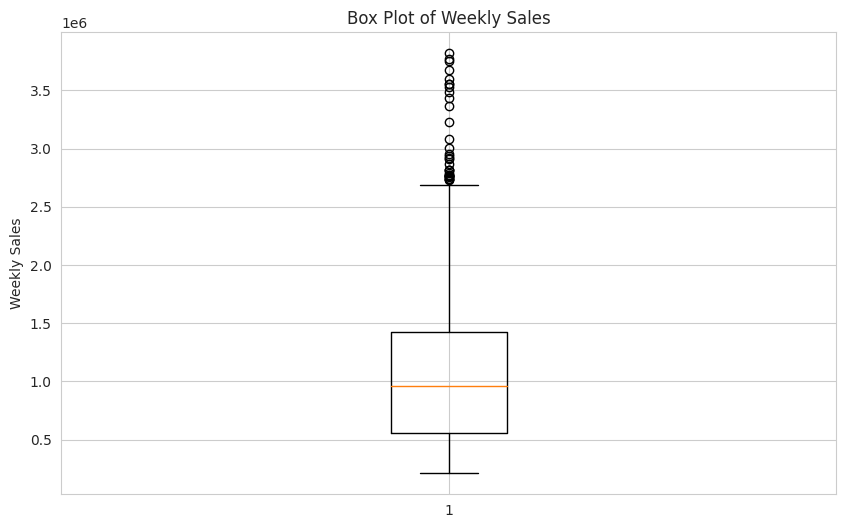

In [ ]:
# significant outliers
# Create a box plot to visualize outliers in weekly sales
plt.figure(figsize=(10, 6))
plt.boxplot(data['Weekly_Sales'])
plt.title('Box Plot of Weekly Sales')
plt.ylabel('Weekly Sales')
plt.show()

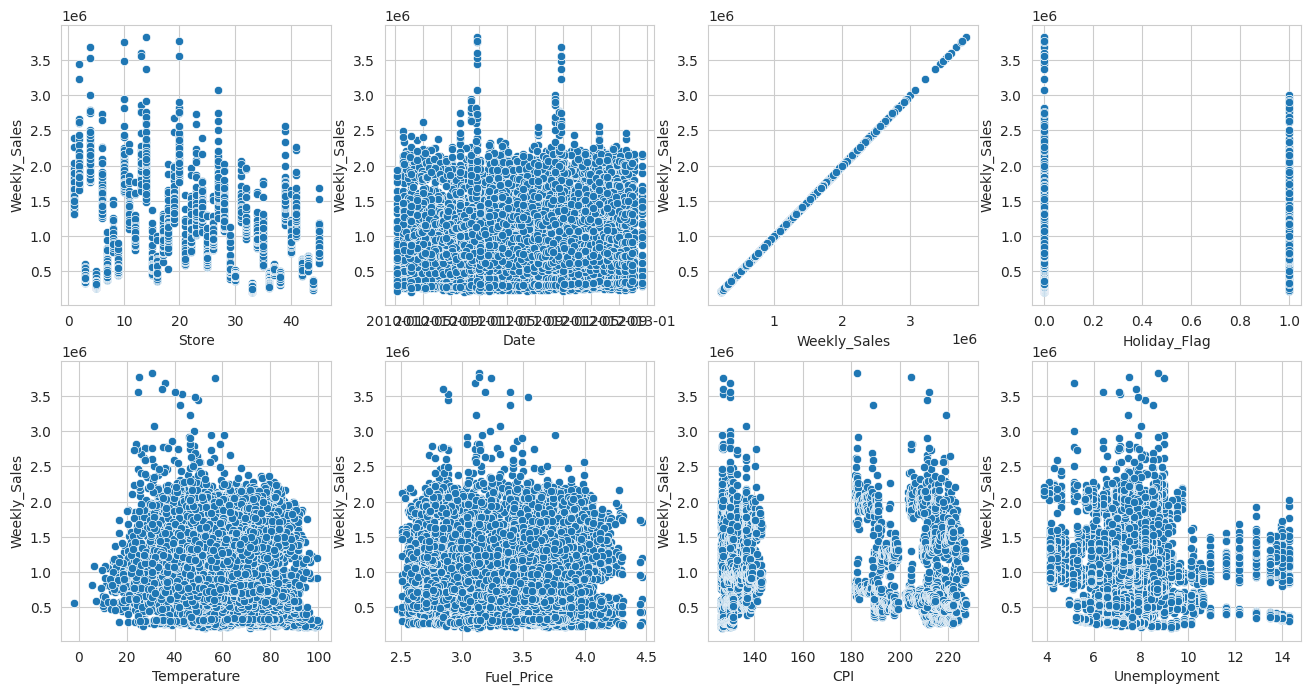

In [ ]:
# visualize correlations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

col_list = data.columns

plt.subplots(2,4, figsize=(16,8))
i = 1
for col in col_list:
    plt.subplot(2,4,i)
    sns.scatterplot(x=col, y='Weekly_Sales', data=data)
    i += 1

<Axes: xlabel='Fuel_Price', ylabel='Density'>

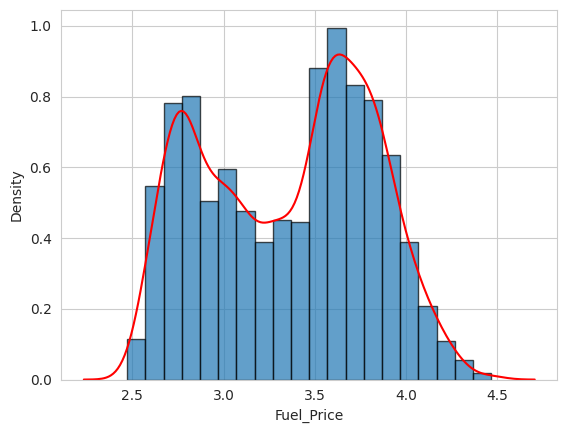

In [ ]:
data['Fuel_Price'].hist(bins=20, edgecolor='black', density=True, alpha=0.7, label='Histogram')
sns.kdeplot(data['Fuel_Price'], color='red',label='KDE')

<Axes: xlabel='Temperature', ylabel='Density'>

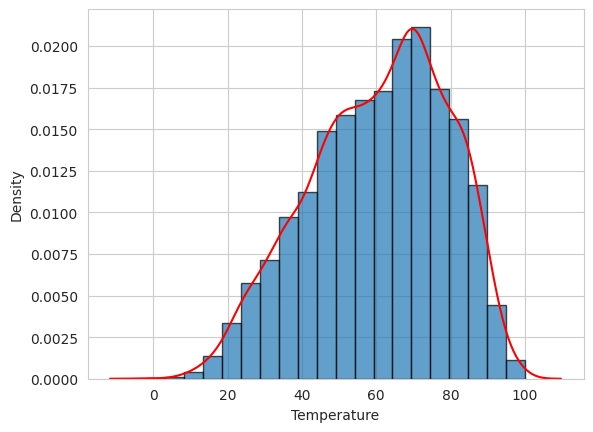

In [ ]:
data['Temperature'].hist(bins=20, edgecolor='black', density=True, alpha=0.7, label='Histogram')
sns.kdeplot(data['Temperature'], color='red',label='KDE')

<Axes: xlabel='CPI', ylabel='Density'>

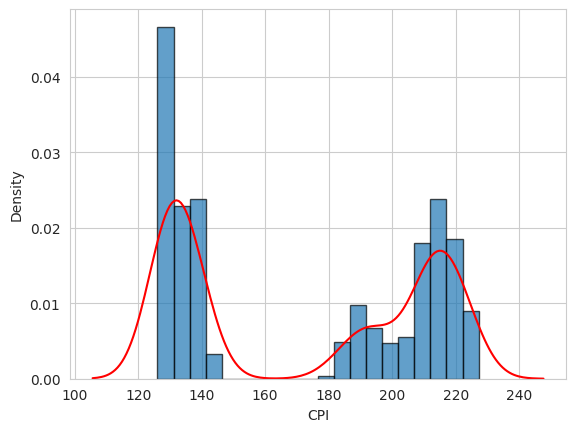

In [ ]:
data['CPI'].hist(bins=20, edgecolor='black', density=True, alpha=0.7, label='Histogram')
sns.kdeplot(data['CPI'], color='red',label='KDE')

<Axes: xlabel='Unemployment', ylabel='Density'>

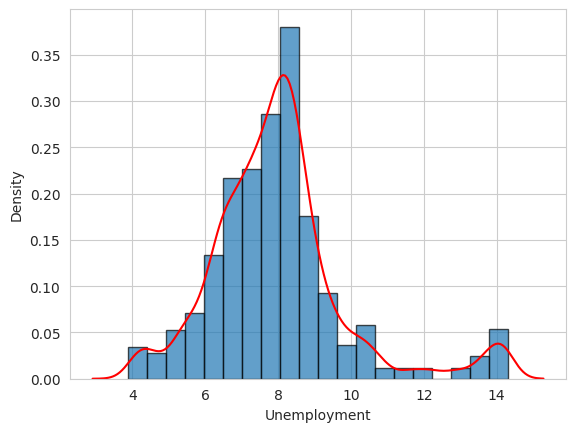

In [ ]:
data['Unemployment'].hist(bins=20, edgecolor='black', density=True, alpha=0.7, label='Histogram')
sns.kdeplot(data['Unemployment'], color='red',label='KDE')

# Feature Engineering

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

data['Weekday'] = data.Date.dt.weekday
data['Month'] = data.Date.dt.month
data['Year'] = data.Date.dt.year
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekday,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [ ]:
data.loc[data['Weekly_Sales']<=0]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekday,Month,Year


<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

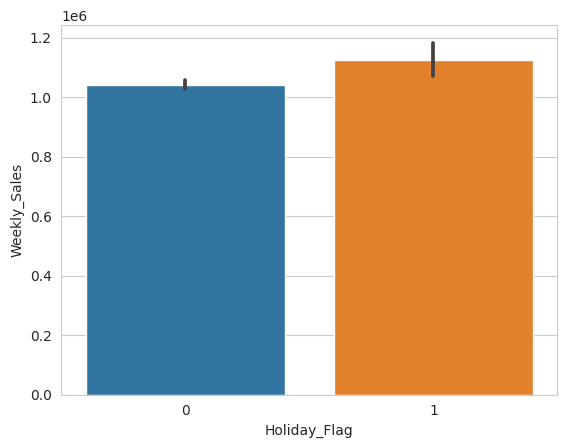

In [ ]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=data)

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

In [ ]:
holiday_data = data[data.Holiday_Flag==1]
dates = holiday_data['Date'].unique()
for date in dates:
  print (str(date).split('T')[0])

2010-12-02
2010-10-09
2010-11-26
2010-12-31
2011-11-02
2011-09-09
2011-11-25
2011-12-30
2012-10-02
2012-07-09


In [ ]:
# All holidays are not in the data. There are 4 holiday values such as;

# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

# Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

# After the 07-Sep-2012 holidays are in test set for prediction. When we look at the data, average weekly sales for holidays are significantly higher than not-holiday days.
# In train data, there are 133 weeks for non-holiday and 10 weeks for holiday.

In [ ]:
# # Super bowl dates in train set
# data.loc[(data['Date'] == '2010-02-12')|(data['Date'] == '2011-02-11')|(data['Date'] == '2012-02-10'),'Super_Bowl'] = 1
# data.loc[(data['Date'] != '2010-02-12')&(data['Date'] != '2011-02-11')&(data['Date'] != '2012-02-10'),'Super_Bowl'] = 0


# # Labor day dates in train set
# data.loc[(data['Date'] == '2010-09-10')|(data['Date'] == '2011-09-09')|(data['Date'] == '2012-09-07'),'Labor_Day'] = 1
# data.loc[(data['Date'] != '2010-09-10')&(data['Date'] != '2011-09-09')&(data['Date'] != '2012-09-07'),'Labor_Day'] = 0


# # Thanksgiving dates in train set
# data.loc[(data['Date'] == '2010-11-26')|(data['Date'] == '2011-11-25'),'Thanksgiving'] = 1
# data.loc[(data['Date'] != '2010-11-26')&(data['Date'] != '2011-11-25'),'Thanksgiving'] = 0


# #Christmas dates in train set
# data.loc[(data['Date'] == '2010-12-31')|(data['Date'] == '2011-12-30'),'Christmas'] = 1
# data.loc[(data['Date'] != '2010-12-31')&(data['Date'] != '2011-12-30'),'Christmas'] = 0


# Seasonality
data['Winter'] = data['Date'].dt.month.isin([12, 1, 2]).astype(int)
data['Spring'] = data['Date'].dt.month.isin([3, 4, 5]).astype(int)
data['Summer'] = data['Date'].dt.month.isin([6, 7, 8]).astype(int)
data['Fall']   = data['Date'].dt.month.isin([9, 10, 11]).astype(int)


# Major Holidays
super_bowl_dates   = ['12-Feb-10', '11-Feb-11', '10-Feb-12', '8-Feb-13']
labour_day_dates   = ['10-Sep-10', '9-Sep-11', '7-Sep-12', '6-Sep-13']
thanksgiving_dates = ['26-Nov-10', '25-Nov-11', '23-Nov-12', '29-Nov-13']
christmas_dates    = ['31-Dec-10', '30-Dec-11', '28-Dec-12', '27-Dec-13']

all_holiday_dates = super_bowl_dates + labour_day_dates + thanksgiving_dates + christmas_dates
data['Super_Bowl'] = data['Date'].isin(pd.to_datetime(super_bowl_dates, format='%d-%b-%y')).astype(int)
data['Labour_Day'] = data['Date'].isin(pd.to_datetime(labour_day_dates, format='%d-%b-%y')).astype(int)
data['Thanksgiving'] = data['Date'].isin(pd.to_datetime(thanksgiving_dates, format='%d-%b-%y')).astype(int)
data['Christmas'] = data['Date'].isin(pd.to_datetime(christmas_dates, format='%d-%b-%y')).astype(int)

# Back-to-school season: late July (from 20th) to after Labor Day
# We'll first create a mask for dates in late July
late_july_mask = (data['Date'].dt.month == 7) & (data['Date'].dt.day >= 20)

# Then a mask for dates up to and including the latest Labour Day in your dataset
# This assumes the Labour Day dates you provided are in ascending order
after_labour_day_mask = data['Date'] > pd.to_datetime(labour_day_dates[-1], format='%d-%b-%y')

# Combine the masks for the full back-to-school period
data['Back_to_School'] = (late_july_mask | data['Date'].isin(pd.to_datetime(labour_day_dates, format='%d-%b-%y')) | after_labour_day_mask).astype(int)


In [ ]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekday,Month,Year,Winter,Spring,Summer,Fall,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Back_to_School
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010,0,1,0,0,0,0,0,0,0
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010,1,0,0,0,0,0,0,0,0
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010,1,0,0,0,0,0,0,0,0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010,1,0,0,0,0,0,0,0,0
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010,0,1,0,0,0,0,0,0,0


Text(0, 0.5, 'Average Weekly Sales')

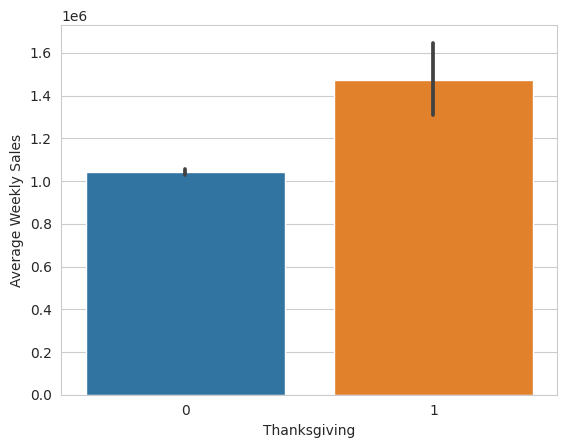

In [ ]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=data)
plt.ylabel('Average Weekly Sales')

Text(0, 0.5, 'Average Weekly Sales')

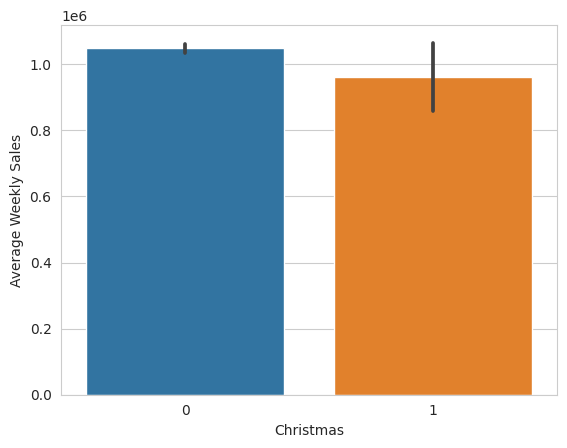

In [ ]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=data)
plt.ylabel('Average Weekly Sales')

Text(0, 0.5, 'Average Weekly Sales')

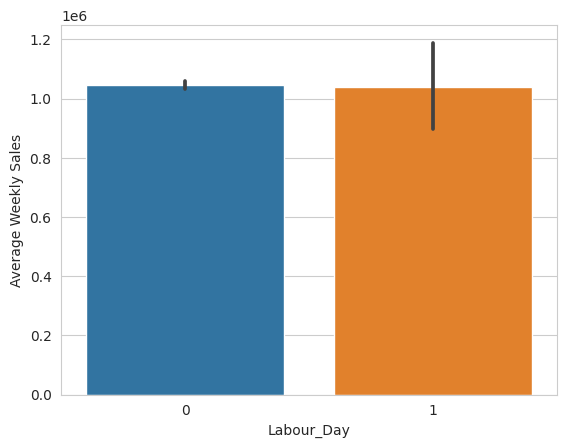

In [ ]:
sns.barplot(x='Labour_Day', y='Weekly_Sales', data=data)
plt.ylabel('Average Weekly Sales')

Text(0, 0.5, 'Average Weekly Sales')

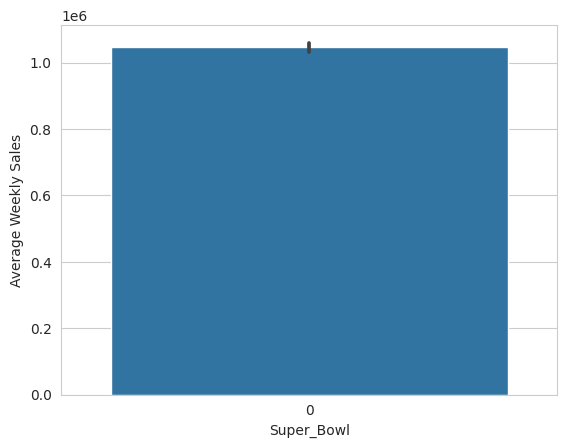

In [ ]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=data)
plt.ylabel('Average Weekly Sales')

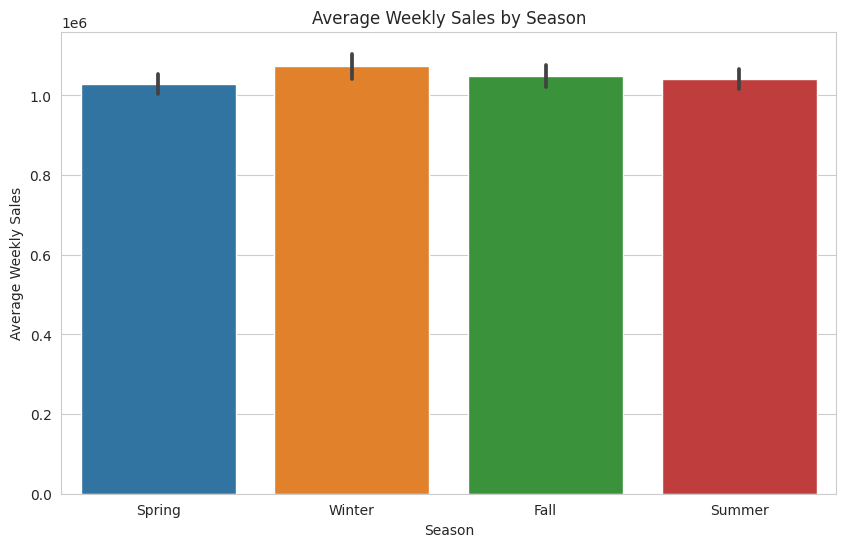

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the data
temp_data = data.copy()

# Create a consolidated column for seasons in the copied dataframe
temp_data['Season'] = ""
temp_data.loc[temp_data['Winter'] == 1, 'Season'] = 'Winter'
temp_data.loc[temp_data['Spring'] == 1, 'Season'] = 'Spring'
temp_data.loc[temp_data['Summer'] == 1, 'Season'] = 'Summer'
temp_data.loc[temp_data['Fall'] == 1, 'Season'] = 'Fall'

# Plot using the temporary dataframe
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Weekly_Sales', data=temp_data)  # No need to specify estimator since default is mean
plt.title('Average Weekly Sales by Season')
plt.ylabel('Average Weekly Sales')
plt.show()


<ipython-input-420-b8509b52e24f>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Holiday', y='Average_Weekly_Sales', data=plot_data, ci=None)


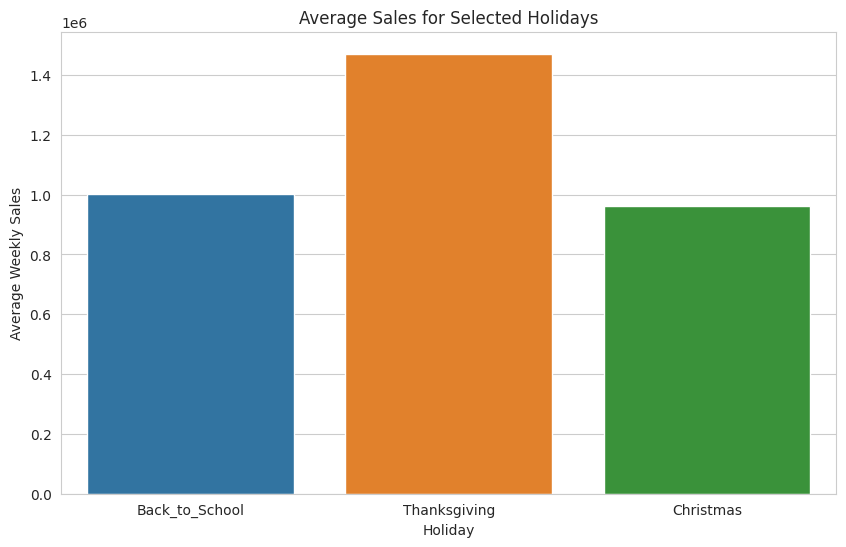

In [ ]:
# Compute average sales for each holiday based on the indicators
avg_back_to_school_sales = data[data['Back_to_School'] == 1]['Weekly_Sales'].mean()
avg_thanksgiving_sales = data[data['Thanksgiving'] == 1]['Weekly_Sales'].mean()
avg_christmas_sales = data[data['Christmas'] == 1]['Weekly_Sales'].mean()

# Construct a DataFrame suitable for plotting
plot_data = pd.DataFrame({
    'Holiday': ['Back_to_School', 'Thanksgiving', 'Christmas'],
    'Average_Weekly_Sales': [avg_back_to_school_sales, avg_thanksgiving_sales, avg_christmas_sales]
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Holiday', y='Average_Weekly_Sales', data=plot_data, ci=None)
plt.title('Average Sales for Selected Holidays')
plt.ylabel('Average Weekly Sales')
plt.show()


In [ ]:
# Weekly lag
data['Lag_1_Week'] = data['Weekly_Sales'].shift(1)

# Monthly lag (assuming 4 weeks in a month for simplicity)
data['Lag_1_Month'] = data['Weekly_Sales'].shift(4)
corr_with_target = data.corr(numeric_only=True)['Weekly_Sales']

# Sort by absolute value
sorted_corr_with_target = corr_with_target.apply(lambda x: abs(x)).sort_values(ascending=False)

sorted_corr_with_target

Weekly_Sales      1.000000
Lag_1_Week        0.945171
Lag_1_Month       0.913500
Store             0.335332
Unemployment      0.106176
Thanksgiving      0.089549
CPI               0.072634
Month             0.067535
Temperature       0.063810
Holiday_Flag      0.036891
Winter            0.026362
Weekday           0.021041
Spring            0.020353
Year              0.018378
Back_to_School    0.018375
Christmas         0.018178
Fuel_Price        0.009464
Summer            0.006686
Fall              0.002338
Labour_Day        0.001157
Super_Bowl             NaN
Name: Weekly_Sales, dtype: float64

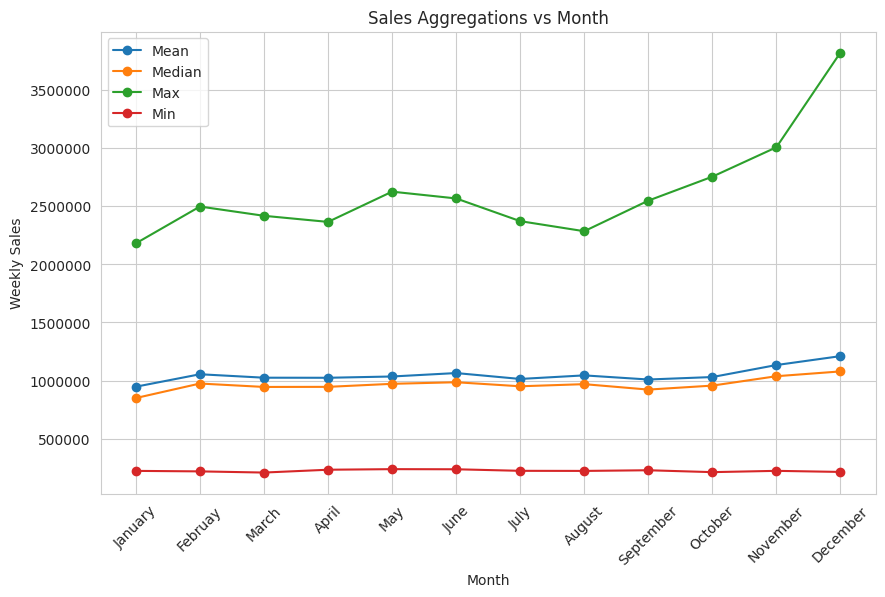

In [ ]:
months = ['January', 'Februay', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Aggregations
mean_sales_per_month = data.groupby('Month')['Weekly_Sales'].mean()
median_sales_per_month = data.groupby('Month')['Weekly_Sales'].median()
max_sales_per_month = data.groupby('Month')['Weekly_Sales'].max()
min_sales_per_month = data.groupby('Month')['Weekly_Sales'].min()

# Plotting
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 6))

# Mapping month numbers to month names for plotting
plt.plot([months[i-1] for i in mean_sales_per_month.index], mean_sales_per_month, marker='o', label='Mean')
plt.plot([months[i-1] for i in median_sales_per_month.index], median_sales_per_month, marker='o', label='Median')
plt.plot([months[i-1] for i in max_sales_per_month.index], max_sales_per_month, marker='o', label='Max')
plt.plot([months[i-1] for i in min_sales_per_month.index], min_sales_per_month, marker='o', label='Min')

# Formatting the y-axis to show actual numbers
formatter = FuncFormatter(lambda x, _: '{:.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)
plt.title('Sales Aggregations vs Month')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

Date
2010    270
2011    180
2012     45
Name: Weekly_Sales, dtype: int64


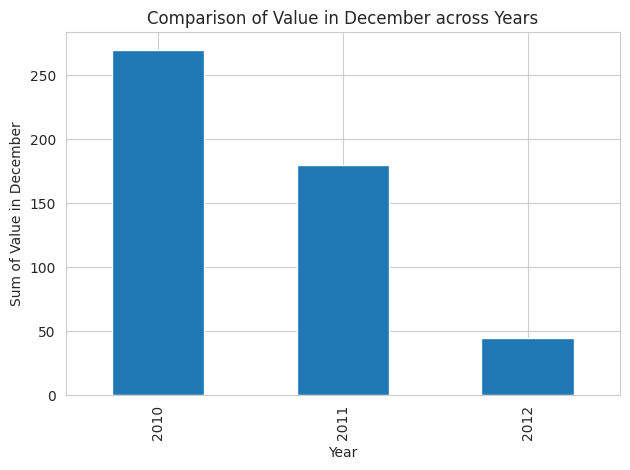

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert "Date" to datetime format
data["Date"] = pd.to_datetime(data["Date"])

# Filter data for December
december_data = data[data["Date"].dt.month == 12]

# Group by year and aggregate data (here we are using sum, but you can use any other aggregate like mean, max, etc.)
december_aggregate = december_data.groupby(december_data["Date"].dt.year)["Weekly_Sales"].count()

# Print the aggregated values
print(december_aggregate)

# Plot the aggregated values
december_aggregate.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Sum of Value in December')
plt.title('Comparison of Value in December across Years')
plt.tight_layout()
plt.show()

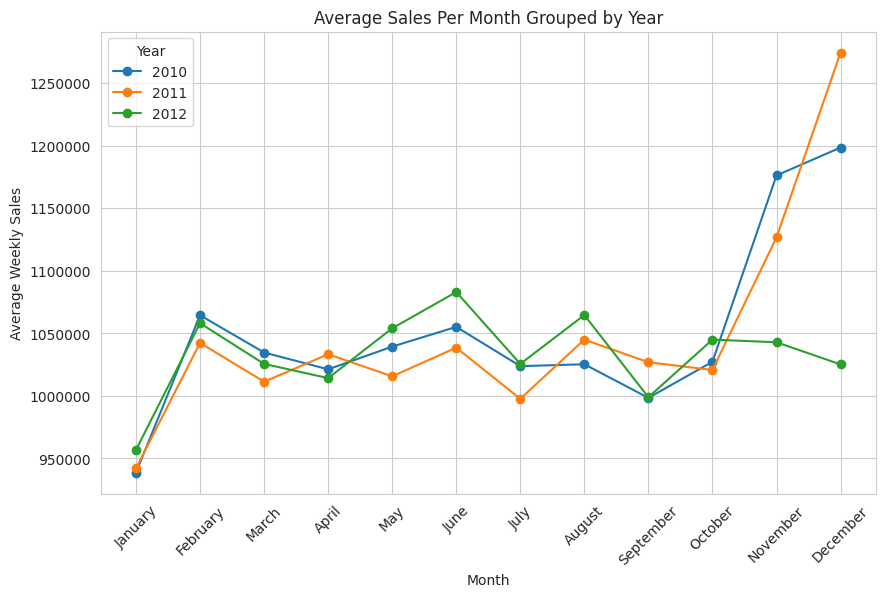

In [ ]:
# Aggregations
# Group by 'Year' and 'Month' and calculate the mean of 'Weekly_Sales'.
mean_sales = data.groupby(['Year', 'Month'])['Weekly_Sales'].mean().unstack('Year')

# Plotting
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 6))

# Plot for each year
for year in mean_sales.columns:
    plt.plot(months, mean_sales[year], marker='o', label=year)

# Formatting the y-axis to show actual numbers
formatter = FuncFormatter(lambda x, _: '{:.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Adding titles and labels
plt.xticks(rotation=45)
plt.title('Average Sales Per Month Grouped by Year')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')

# Adding legend and grid
plt.legend(title='Year')
plt.grid(True)

# Showing the plot
plt.show()

<ipython-input-425-cc53fa56e4ec>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels([months[i-1] for i in mean_sales_per_month.index], rotation=45)
<ipython-input-425-cc53fa56e4ec>:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[1] = plt.subplot(1, 2, 2, polar=True)


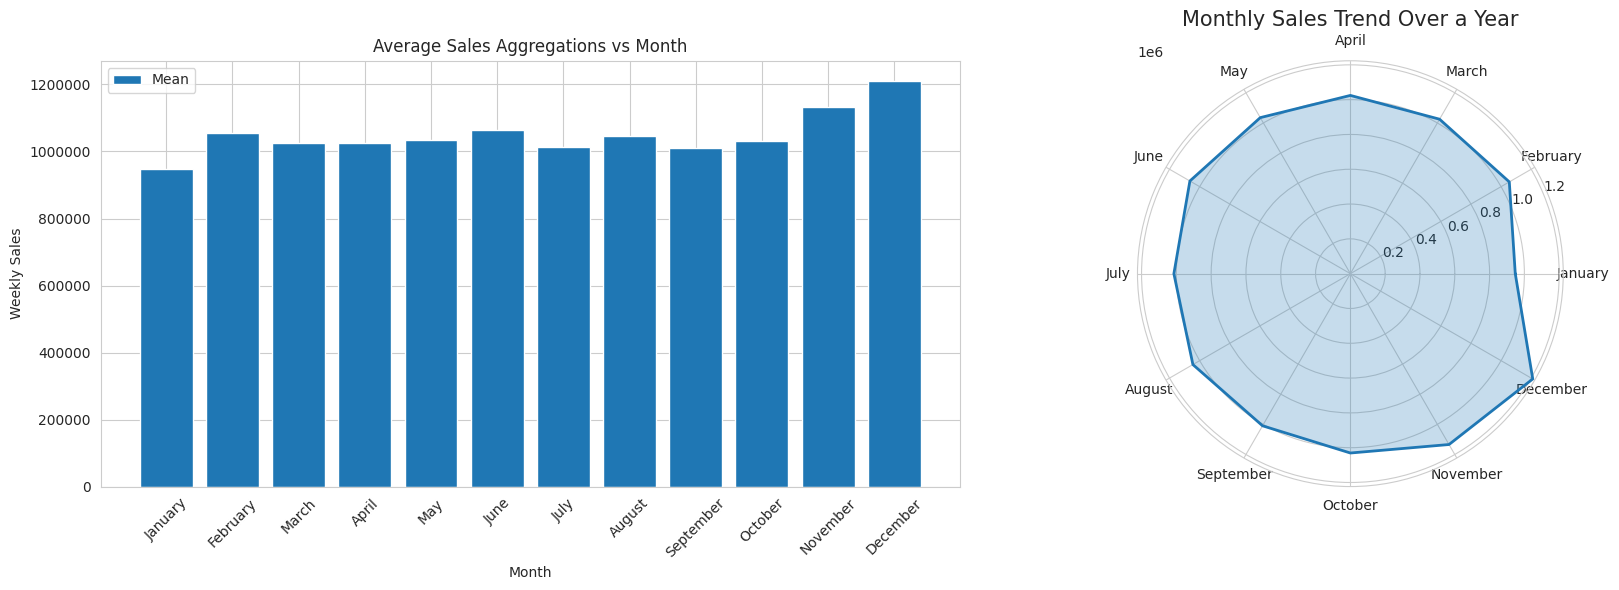

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Assume data is a DataFrame with "Month" and "Weekly_Sales" columns
# mean_sales_per_month = data.groupby('Month')['Weekly_Sales'].mean()

# Creating a figure and a grid of subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Bar Chart
ax[0].bar([months[i-1] for i in mean_sales_per_month.index], mean_sales_per_month, label='Mean')

# Formatting the y-axis to show actual numbers
formatter = plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x))
ax[0].yaxis.set_major_formatter(formatter)

ax[0].set_xticklabels([months[i-1] for i in mean_sales_per_month.index], rotation=45)
ax[0].set_title('Average Sales Aggregations vs Month')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Weekly Sales')
ax[0].legend()

# Radar Chart
ax[1] = plt.subplot(1, 2, 2, polar=True)

# Compute number of variables (here, months) and create an array with those
num_vars = len(months)
theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
values=mean_sales_per_month.tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end.
values += values[:1]
theta += theta[:1]

# Plot
ax[1].fill(theta, values, alpha=0.25)
ax[1].plot(theta, values, linewidth=2, linestyle='solid')

# Labels for each point
ax[1].set_xticks(theta[:-1])
ax[1].set_xticklabels(months)

# Title
ax[1].set_title('Monthly Sales Trend Over a Year', position=(0.5, 1.1), size=15)

plt.tight_layout()
plt.show()


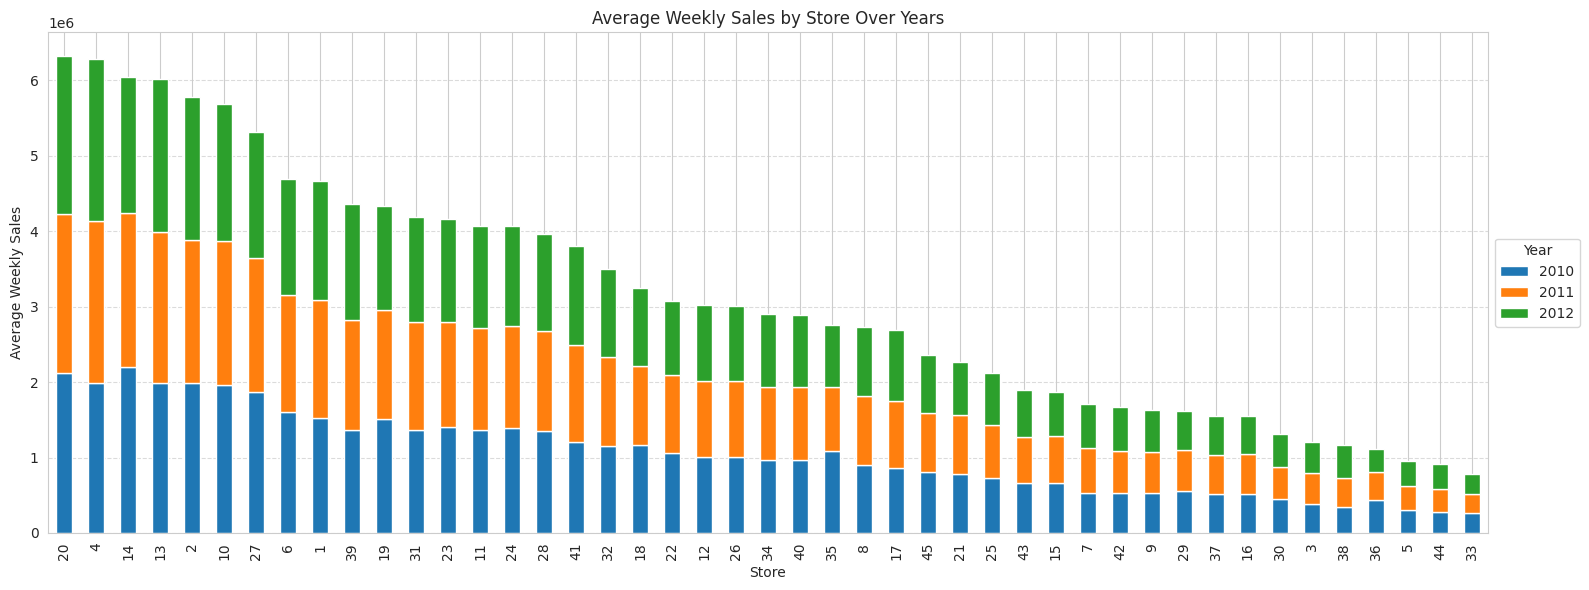

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming "data" is a DataFrame with "Store", "Weekly_Sales", and a "Date" column
data['Year'] = pd.DatetimeIndex(data['Date']).year

# Grouping by Store and Year and calculating the mean of Weekly_Sales
average_sales_by_store_year = data.groupby(['Store', 'Year'])['Weekly_Sales'].mean().reset_index()

# Pivot the data to get it in the right format for a stacked bar plot
pivot_data = average_sales_by_store_year.pivot(index='Store', columns='Year', values='Weekly_Sales').fillna(0)

# Create a 'Total' column to capture the total sales across all years for each store
pivot_data['Total'] = pivot_data.sum(axis=1)

# Sort the data by the 'Total' column
pivot_data = pivot_data.sort_values(by='Total', ascending=False)

# Drop the 'Total' column, since we don't want to plot it
pivot_data = pivot_data.drop(columns='Total')

# Plottingf
plt.figure(figsize=(16, 6))

# Creating a stacked bar plot
pivot_data.plot(kind='bar', stacked=True, figsize=(16, 6), ax=plt.gca())

plt.title('Average Weekly Sales by Store Over Years')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.legend(title='Year', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# There are 45 stores in data. Departments are not same in all stores.
# As expected, holiday average sales are higher than normal dates.
# Christmas holiday introduces as the last days of the year. But people generally shop at 51th week. So, when we look at the total sales of holidays, Thankgiving has higher sales between them which was assigned by Walmart.
# Year 2010 has higher sales than 2011 and 2012. But, November and December sales are not in the data for 2012. Even without highest sale months, 2012 is not significantly less than 2010, so after adding last two months, it can be first.
# It is obviously seen that week 51 and 47 have higher values and 50-48 weeks follow them. Interestingly, 5th top sales belongs to 22th week of the year. This results show that Christmas, Thankgiving and Black Friday are very important than other weeks for sales and 5th important time is 22th week of the year and it is end of the May, when schools are closed. Most probably, people are preparing for holiday at the end of the May.
# January sales are significantly less than other months. This is the result of November and December high sales. After two high sales month, people prefer to pay less on January.

In [ ]:
encoded_stores = pd.get_dummies(data['Store'], prefix='Store', drop_first=True)
data.drop(columns=['Store'], axis=1)
data = pd.concat([data, encoded_stores], axis=1)

In [ ]:
# Remove null values that resukt from lagging the Weekly_Sales
data = data.dropna()

In [ ]:
# len(data.columns)

In [ ]:
new_data = data.sort_values(by='Date', ascending=True) # sorting according to date
new_data['Date'] = (new_data['Date'] - new_data['Date'].min()) / np.timedelta64(1, 'D')
new_data = new_data.sort_values(by='Date', ascending=True) # sorting according to date

train_data = new_data.iloc[:int(len(new_data) * 0.7),:]
test_data  = new_data.iloc[int(len(new_data) * 0.7):,:]

X_train = train_data.drop(columns=['Weekly_Sales'])
X_test = test_data.drop(columns=['Weekly_Sales'])

y_train = train_data['Weekly_Sales']
y_test  = test_data['Weekly_Sales']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler


# ------------------------------ Decision Tree ------------------------------
tree_reg = DecisionTreeRegressor(
    max_depth=5, # reduce max_depth
    random_state=42 # for reproducibility
)

tree_reg.fit(X_train, y_train)
pred_tree_reg = tree_reg.predict(X_test)
test_error_tree_reg = mean_absolute_percentage_error(y_test, pred_tree_reg)

train_pred_tree_reg = tree_reg.predict(X_train)
train_error_tree_reg = mean_absolute_percentage_error(y_train, train_pred_tree_reg)


# ------------------------------ Linear Regression ------------------------------
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
pred_lin_reg = lin_reg.predict(X_test)
test_error_lin_reg = mean_absolute_percentage_error(y_test, pred_lin_reg)

train_pred_lin_reg = lin_reg.predict(X_train)
train_error_lin_reg = mean_absolute_percentage_error(y_train, train_pred_lin_reg)

# Print Errors
print("Train MAPE for Decision Tree:")
print(train_error_tree_reg)
print("Test MAPE for Decision Tree:")
print(test_error_tree_reg)
print()

print("Train MAPE for Linear Regression:")
print(train_error_lin_reg)
print("Test WMAE for Linear Regression:")
print(test_error_lin_reg)
print()

Train MAPE for Decision Tree:
0.08816483803534281
Test MAPE for Decision Tree:
0.07743641312957018

Train MAPE for Linear Regression:
0.09351281151923814
Test WMAE for Linear Regression:
0.08544250944241605



In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import numpy as np

y = new_data['Weekly_Sales']
X = new_data.drop(columns=['Weekly_Sales'], axis=1)

# Define the parameter grid to search over
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 5, 10, 15],
}

# Set up the TimeSeriesSplit
tscv_outer = TimeSeriesSplit(n_splits=10)

# Lists to store results
best_params_per_fold = []
mape_scores_inner = []   # To store average MAPE scores of the inner loop
mape_scores_outer = []   # To store MAPE scores for the outer loop

# Outer loop
for train_index, test_index in tscv_outer.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Inner loop for hyperparameter tuning using TimeSeriesSplit
    tscv_inner = TimeSeriesSplit(n_splits=5)
    grid_search = GridSearchCV(
        DecisionTreeRegressor(),
        param_grid,
        scoring='neg_mean_absolute_percentage_error',  # Use MAPE for grid search
        cv=tscv_inner,
        return_train_score=True
    )
    grid_search.fit(X_train, y_train)

    # Store the best parameters for this fold
    best_params_per_fold.append(grid_search.best_params_)
    # Store the mean MAPE score of the inner loop for this fold
    mape_scores_inner.append(-grid_search.best_score_)

    # Evaluate the best estimator on the current test split of the outer loop
    best_dt = grid_search.best_estimator_
    y_pred = best_dt.predict(X_test)

    mape_scores_outer.append(mean_absolute_percentage_error(y_test, y_pred))

# Identify the index of the fold with the best model overall based on inner validation scores
best_fold_index = np.argmin(mape_scores_inner)

# Retrieve the best model's parameters
best_overall_params = best_params_per_fold[best_fold_index]

print("Best overall parameters:", best_overall_params)
print()

# Output the results for both inner and outer loop
mape_scores_inner = np.array(mape_scores_inner)
mape_scores_outer = np.array(mape_scores_outer)

print("Average MAPE - Inner CV: %0.2f (+/- %0.2f)" % (mape_scores_inner.mean(), mape_scores_inner.std() * 2))
print(mape_scores_inner)
print()

print("Average MAPE - Outer CV: %0.2f (+/- %0.2f)" % (mape_scores_outer.mean(), mape_scores_outer.std() * 2))
print(mape_scores_outer)
print()

Best overall parameters: {'max_depth': 10, 'min_samples_leaf': 1}

Average MAPE - Inner CV: 0.10 (+/- 0.02)
[0.11729767 0.10484092 0.09125216 0.1124339  0.10866818 0.09620575
 0.09204422 0.08812815 0.08814513 0.08794759]

Average MAPE - Outer CV: 0.09 (+/- 0.07)
[0.09760972 0.06075737 0.16363076 0.14776154 0.0595275  0.06192592
 0.09723497 0.06823936 0.06236873 0.05787882]



In [ ]:
best_model = DecisionTreeRegressor(**best_overall_params)
best_model.fit(X, y)


# best_overall_params = {'alpha': 0.0001, 'fit_intercept': True, 'max_iter': 1500, 'precompute': True, 'selection': 'random', 'tol': 0.01}

# pipeline = make_pipeline(StandardScaler(), Lasso(**best_overall_params))
best_model.fit(X, y)


# Predict using the best model
predictions = best_model.predict(X)

predictions_df = data.drop(columns=['Weekly_Sales'], axis=1)

# Convert predictions list to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Predicted_sales'])

# Concatenate data and predictions side by side
predictions_df = pd.concat([data, predictions_df], axis=1)


In [ ]:
predictions_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekday,Month,...,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Predicted_sales
4,1.0,2010-05-03,1554806.68,0.0,46.50,2.625,211.350143,8.106,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.933479e+06
5,1.0,2010-12-03,1439541.59,0.0,57.79,2.667,211.380643,8.106,4.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.680215e+06
6,1.0,2010-03-19,1472515.79,0.0,54.58,2.720,211.215635,8.106,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.993497e+05
7,1.0,2010-03-26,1404429.92,0.0,51.45,2.732,211.018042,8.106,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.886015e+05
8,1.0,2010-02-04,1594968.28,0.0,62.27,2.719,210.820450,7.808,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.727807e+05


In [ ]:
print(len(predictions_df))

6435


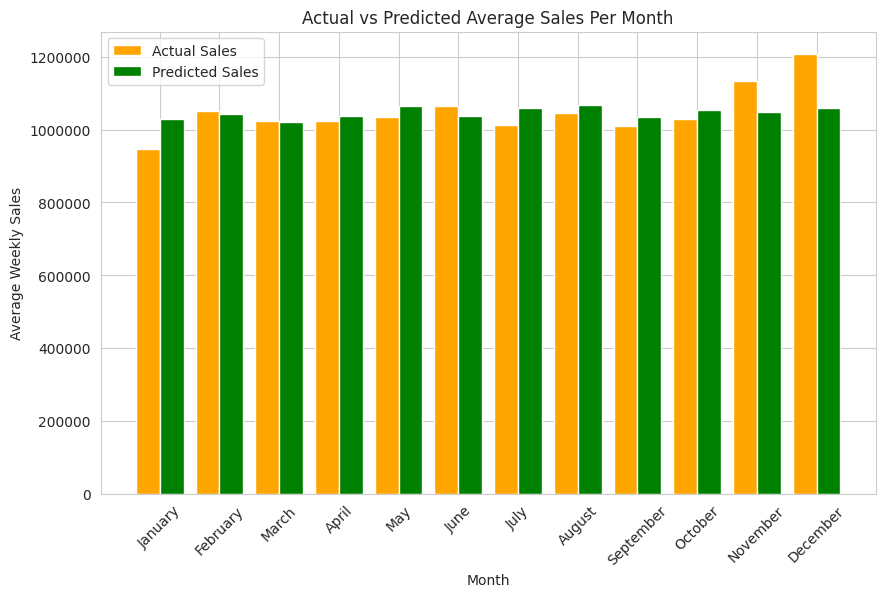

In [ ]:

# Mean predicted_sales
# Group by 'Year' and 'Month' and calculate the mean of 'Predicted_sales'.
mean_pred_sales = predictions_df.groupby(['Month'])['Predicted_sales'].mean()


# Mean sales
# Group by 'Year' and 'Month' and calculate the mean of 'Weekly_Sales'.
mean_sales = data.groupby(['Month'])['Weekly_Sales'].mean()

from matplotlib.ticker import FuncFormatter


months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
width = 0.4  # Width of the bars
x = range(len(months))

plt.figure(figsize=(10, 6))

# Adjust the position of bars using the width parameter
plt.bar([i - width/2 for i in x], mean_sales, width=width, label='Actual Sales', color='orange')
plt.bar([i + width/2 for i in x], mean_pred_sales, width=width, label='Predicted Sales', color='g')

# Formatting the y-axis to show actual numbers
formatter = FuncFormatter(lambda x, _: '{:.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Adding titles and labels
plt.xticks(x, months, rotation=45)
plt.title('Actual vs Predicted Average Sales Per Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')

# Adding legend and grid
plt.legend()
plt.grid(True, axis='y')

# Showing the plot
plt.show()


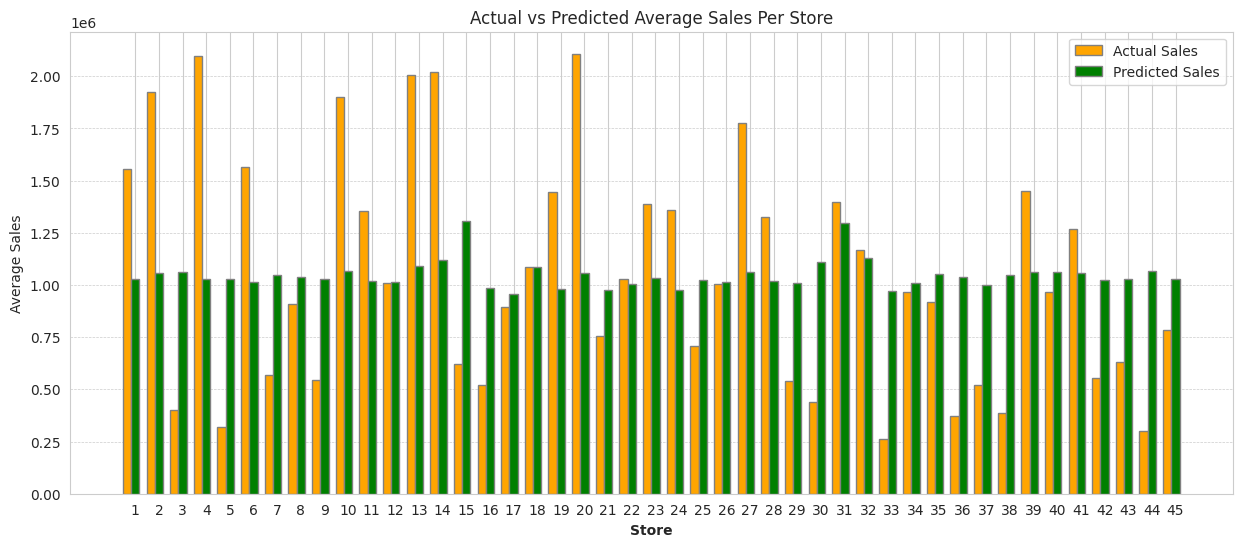

In [ ]:
# Group by 'Store' and calculate the mean of 'Predicted_sales'
mean_pred_sales = predictions_df.groupby(['Store'])['Predicted_sales'].mean()

# Group by 'Store' and calculate the mean of 'Weekly_Sales'
mean_sales = data.groupby(['Store'])['Weekly_Sales'].mean()

# Plotting
plt.figure(figsize=(15, 6))

# Bar width
barWidth = 0.35

# Set position of bar on X axis
r1 = np.arange(len(mean_sales))
r2 = [x + barWidth for x in r1]

# Plot actual vs predicted
plt.bar(r1, mean_sales, color='orange', width=barWidth, edgecolor='grey', label='Actual Sales')
plt.bar(r2, mean_pred_sales, color='g', width=barWidth, edgecolor='grey', label='Predicted Sales')

# Adding titles and labels
plt.title('Actual vs Predicted Average Sales Per Store')
plt.xlabel('Store', fontweight='bold')
plt.ylabel('Average Sales')

# Adding legend and grid
plt.xticks([r + barWidth for r in range(len(mean_sales))], mean_sales.index)  # set x-tick positions and labels
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

# Showing the plot
plt.show()

In [ ]:
<workflow-app name="My Workflow" xmlns="uri:oozie:workflow:0.5">
    <start to="shell-b3de"/>
    <kill name="Kill">
        <message>Action failed, error message[${wf:errorMessage(wf:lastErrorNode())}]</message>
    </kill>
    <action name="shell-b3de">
        <shell xmlns="uri:oozie:shell-action:0.1">
            <job-tracker>${jobTracker}</job-tracker>
            <name-node>${nameNode}</name-node>
            <exec>happy2015</exec>
            <file>sqoop import \ --connect jdbc:mysql://happiness.ccj5of7wioah.us-east-1.rds.amazonaws.com/happy \ --username admin \ --password admin1234 \ --table Happiness2015 \ --target-dir /user/hadoop/happy2015#happy2015</file>
              <capture-output/>
        </shell>
        <ok to="email-e1c5"/>
        <error to="Kill"/>
    </action>
    <action name="email-e1c5">
        <email xmlns="uri:oozie:email-action:0.2">
            <to>yonahbyarugaba@gmail.com</to>
            <subject>Sqoop job status</subject>
            <body>Job completed</body>
            <content_type>text/plain</content_type>
        </email>
        <ok to="End"/>
        <error to="Kill"/>
    </action>
    <end name="End"/>
</workflow-app>